In [53]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.text import Tokenizer
import pandas as pd
import os
from nltk.stem import PorterStemmer, WordNetLemmatizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import plot_model


In [4]:
CUR_DIR = os.path.abspath(os.curdir)
ROOT_DIR = os.path.dirname(CUR_DIR)
IMAGES_DIR = os.path.join(ROOT_DIR, "images")
DATA_DIR = os.path.join(ROOT_DIR, "data")
MODELS_DIR = os.path.join(ROOT_DIR, "models")
MODELS_DIR

'/home/jovyan/projects/vector-nlp/models'

In [29]:
vocab_size = 1000
tokenizer = Tokenizer(num_words = vocab_size,oov_token = 'N/A')

In [25]:
validation_df = pd.read_csv(os.path.join(DATA_DIR,'raw','validation.csv'))
training_df = pd.read_csv(os.path.join(DATA_DIR,'raw','training.csv'))
test_df = pd.read_csv(os.path.join(DATA_DIR,'raw','test.csv'))

porter_stemmer = PorterStemmer()
def stem_sentences(sentence):
    tokens = sentence.split()
    stemmed_tokens = [porter_stemmer.stem(token) for token in tokens]
    return ' '.join(stemmed_tokens)

X_train = training_df['review'].apply(stem_sentences)
y_train = training_df['star']

X_val = validation_df['review'].apply(stem_sentences)
y_val = validation_df['star']

X_test = test_df['review'].apply(stem_sentences)
y_test = test_df['star']

# Convert words to index representation
tokenizer.fit_on_texts(X_train)
X_train = pad_sequences(tokenizer.texts_to_sequences(X_train),padding = 'post',truncating = 'post', maxlen = 40)
X_test = pad_sequences(tokenizer.texts_to_sequences(X_test),padding = 'post',truncating = 'post', maxlen = 40)
X_val = pad_sequences(tokenizer.texts_to_sequences(X_val),padding = 'post',truncating = 'post', maxlen = 40)

In [26]:
X_val

array([[ 20,  11,   0, ...,   0,   0,   0],
       [ 89,  17,  40, ...,   0,   0,   0],
       [  1, 185,   0, ...,   0,   0,   0],
       ...,
       [ 36,   1,   1, ...,   0,   0,   0],
       [  1,   1,   0, ...,   0,   0,   0],
       [ 26,   6,   0, ...,   0,   0,   0]], dtype=int32)

In [23]:
tokenizer.word_index

{'N/A': 1,
 'it': 2,
 'the': 3,
 'i': 4,
 'to': 5,
 'app': 6,
 'and': 7,
 'a': 8,
 'is': 9,
 'thi': 10,
 'good': 11,
 'for': 12,
 'my': 13,
 'use': 14,
 'of': 15,
 'but': 16,
 'work': 17,
 'great': 18,
 'on': 19,
 'veri': 20,
 'you': 21,
 'love': 22,
 'not': 23,
 'in': 24,
 'have': 25,
 'nice': 26,
 'that': 27,
 'like': 28,
 'best': 29,
 'with': 30,
 'so': 31,
 "it'": 32,
 'be': 33,
 'updat': 34,
 'all': 35,
 'no': 36,
 'me': 37,
 'can': 38,
 'just': 39,
 'need': 40,
 'phone': 41,
 'when': 42,
 'game': 43,
 'one': 44,
 'if': 45,
 'play': 46,
 'as': 47,
 'thank': 48,
 'get': 49,
 'time': 50,
 'what': 51,
 'download': 52,
 'up': 53,
 'pleas': 54,
 'or': 55,
 'googl': 56,
 'awesom': 57,
 'wa': 58,
 'an': 59,
 'do': 60,
 'would': 61,
 "can't": 62,
 'are': 63,
 'realli': 64,
 'now': 65,
 'more': 66,
 'onli': 67,
 'your': 68,
 'fix': 69,
 'make': 70,
 'from': 71,
 'doe': 72,
 'help': 73,
 "doesn't": 74,
 "don't": 75,
 'ha': 76,
 'easi': 77,
 'tri': 78,
 'there': 79,
 'will': 80,
 'other': 81

In [42]:
X_train.shape

(172839, 40)

In [96]:
model = tf.keras.models.Sequential()
model.add(keras.Input(shape=(X_train.shape[1],)))
# model.add(tf.keras.layers.Flatten())
# model.add(tf.keras.layers.SimpleRNN(16))
model.add(tf.keras.layers.Dense(50, activation="relu"))
model.add(tf.keras.layers.Dense(50, activation="relu"))
model.add(tf.keras.layers.Dense(16, activation="relu"))
model.add(tf.keras.layers.Dense(16, activation="relu"))
model.add(tf.keras.layers.Dense(1, activation="relu"))

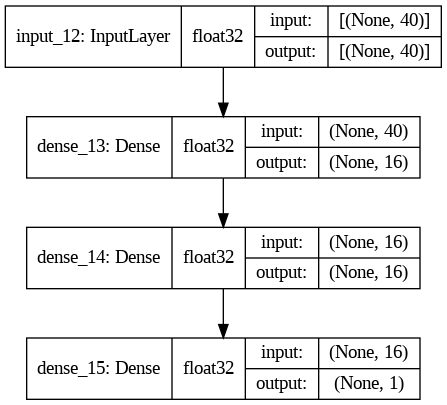

In [54]:
plot_model(model,show_shapes=True, show_dtype=True,
    show_layer_names=True, rankdir='TB', expand_nested=True, dpi=96)

In [55]:
model.summary()

Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_13 (Dense)             (None, 16)                656       
_________________________________________________________________
dense_14 (Dense)             (None, 16)                272       
_________________________________________________________________
dense_15 (Dense)             (None, 1)                 17        
Total params: 945
Trainable params: 945
Non-trainable params: 0
_________________________________________________________________


In [97]:
model.compile(optimizer="Adam"
              , loss="mae", metrics=["mae"])

In [98]:
callback = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss', patience=3, verbose=3
)
history = model.fit(X_train, y_train, 
                    epochs=10, 
                    callbacks=[callback],
                    validation_data=(X_test, y_test))

Epoch 1/10
5402/5402 [==============================] - 11s 2ms/step - loss: 1.2404 - mae: 1.2404 - val_loss: 0.9573 - val_mae: 0.9573
Epoch 2/10
5402/5402 [==============================] - 10s 2ms/step - loss: 0.9666 - mae: 0.9666 - val_loss: 0.9559 - val_mae: 0.9559
Epoch 3/10
5402/5402 [==============================] - 11s 2ms/step - loss: 0.9622 - mae: 0.9622 - val_loss: 0.9578 - val_mae: 0.9578
Epoch 4/10
5402/5402 [==============================] - 12s 2ms/step - loss: 0.9600 - mae: 0.9600 - val_loss: 0.9471 - val_mae: 0.9471
Epoch 5/10
5402/5402 [==============================] - 12s 2ms/step - loss: 0.9612 - mae: 0.9612 - val_loss: 0.9565 - val_mae: 0.9565
Epoch 6/10
5402/5402 [==============================] - 11s 2ms/step - loss: 0.9585 - mae: 0.9585 - val_loss: 0.9507 - val_mae: 0.9507
Epoch 7/10
5402/5402 [==============================] - 12s 2ms/step - loss: 0.9578 - mae: 0.9578 - val_loss: 0.9493 - val_mae: 0.9493
Epoch 00007: early stopping


In [73]:
model.evaluate(X_val, y_val)  

1801/1801 [==============================] - 5s 3ms/step - loss: 0.9504 - mae: 0.9504


[0.9503933191299438, 0.9503933191299438]

In [88]:
y_pred = model.predict(X_val)

In [89]:
max(y_pred)

array([4.9804826], dtype=float32)

In [90]:
min(y_pred)

array([4.979532], dtype=float32)

In [87]:
eval_df = pd.merge(validation_df['review'], y_val, left_index=True, right_index=True)
# eval_df.to_csv(os.path.join(DATA_DIR,'raw','validation.csv'))
eval_df['prediction'] = model.predict(X_val).ravel()
eval_df['absolute_error'] = (eval_df['prediction'] - eval_df['star']).abs()
eval_df.sort_values('star')

,review,star,prediction,absolute_error
17953,Not installing in my oneplus I used this for y...,1,4.979532,3.979532
19328,Bad news I uninstalled it some of the progra...,1,4.979532,3.979532
19330,Unable to activate it My mobile has very patch...,1,4.979532,3.979532
19333,Does nothing This apps ask you to donate 1$ bu...,1,4.979532,3.979532
19334,No good Have a nexus 7 every time I go to Laun...,1,4.979532,3.979532
...,...,...,...,...
24062,Fixed now,5,4.979532,0.020468
24064,Great Password Manager. Via Dropbox I can keep...,5,4.979532,0.020468
24067,Help Any tips everything I try booting up the ...,5,4.979532,0.020468
24051,Cool app It is a time saver app. Thanks for ma...,5,4.979532,0.020468
